In [2]:
using DiffEqBiological;
using DifferentialEquations;
using Plots;
using Latexify;

In [3]:
libA_K_m = 5800; # nmol
libA_V_max = 0.16;# nmol/min
puhB_K_m = 7600;# nmol
puhB_k_cat = 4.3;# 1/sec
libA_conc = 0.0006;# nmol rough ball
NAT1_rate = 68; # nmol/min/mg
#AT1_rate = 680;
NAT1_conc = 0.00001
linuron_rate_in = 20.

20.0

In [6]:
rn = @reaction_network begin
    k, 0 --> X
    mm(X, v, K), X --> Y
    k, Y --> Z
    end k2 v K k;

In [7]:
latexify(rn)

L"\begin{align}
\frac{dX}{dt} =& k - \frac{v \cdot X}{K + X} \cdot X \\
\frac{dY}{dt} =& \frac{v \cdot X}{K + X} \cdot X - k \cdot Y \\
\frac{dZ}{dt} =& k \cdot Y \\
\end{align}
"

In [346]:
p_libA = (linuron_rate_in, libA_V_max, libA_K_m, NAT1_rate*NAT1_conc); # Parameters assuming libA concentration invariance and linear NAT1 rate

In [347]:
u0 = [600., 0.001, 0.001];
tspan = (0., 100.);

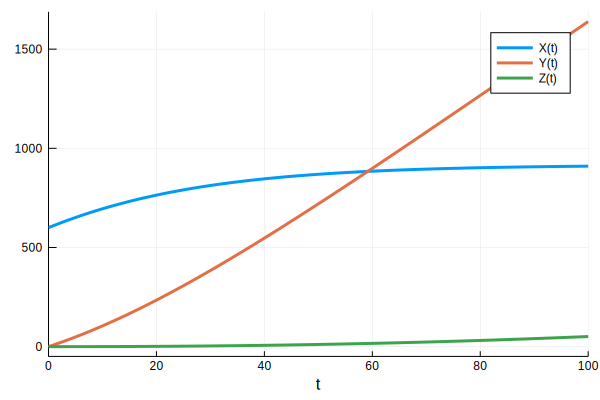

In [348]:
prob_libA = ODEProblem(rn, u0, tspan, p_libA);
sol_libA = solve(prob_libA, DynamicSS(Tsit5()));
plot(sol_libA)

In [334]:
p_puhB = (puhB_k_cat*60*libA_conc, libA_K_m, NAT1_rate*NAT1_conc); # Parameters assuming puhB catalytic efficiency and dummy concentration and linear NAT1 rate

In [319]:
prob_puhB = ODEProblem(rn, u0, tspan, p_puhB);
sol_puhB = solve(prob_puhB, DynamicSS(Tsit5()));
plot(sol_puhB)

BoundsError: BoundsError: attempt to access (0.1548, 5800, 6.8)
  at index [4]